In [1]:
# importing libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, plot_roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
col_names = ['ID', 'RI', 'Na', 'Mg','Al', 'Si', 'K', 'Ca','Ba', 'Fe', 'Glass_type']

In [3]:
data= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv", names=col_names, sep=",")
data

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
data.shape

(214, 11)

In [5]:
data.describe()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
# checking for missing values
data.isna().sum()

ID            0
RI            0
Na            0
Mg            0
Al            0
Si            0
K             0
Ca            0
Ba            0
Fe            0
Glass_type    0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          214 non-null    int64  
 1   RI          214 non-null    float64
 2   Na          214 non-null    float64
 3   Mg          214 non-null    float64
 4   Al          214 non-null    float64
 5   Si          214 non-null    float64
 6   K           214 non-null    float64
 7   Ca          214 non-null    float64
 8   Ba          214 non-null    float64
 9   Fe          214 non-null    float64
 10  Glass_type  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [8]:
#dropping id from the dataset
data= data.drop(columns=['ID'])
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [9]:
# All the given data is numerical now lets visualize the data

<function matplotlib.pyplot.show(close=None, block=None)>

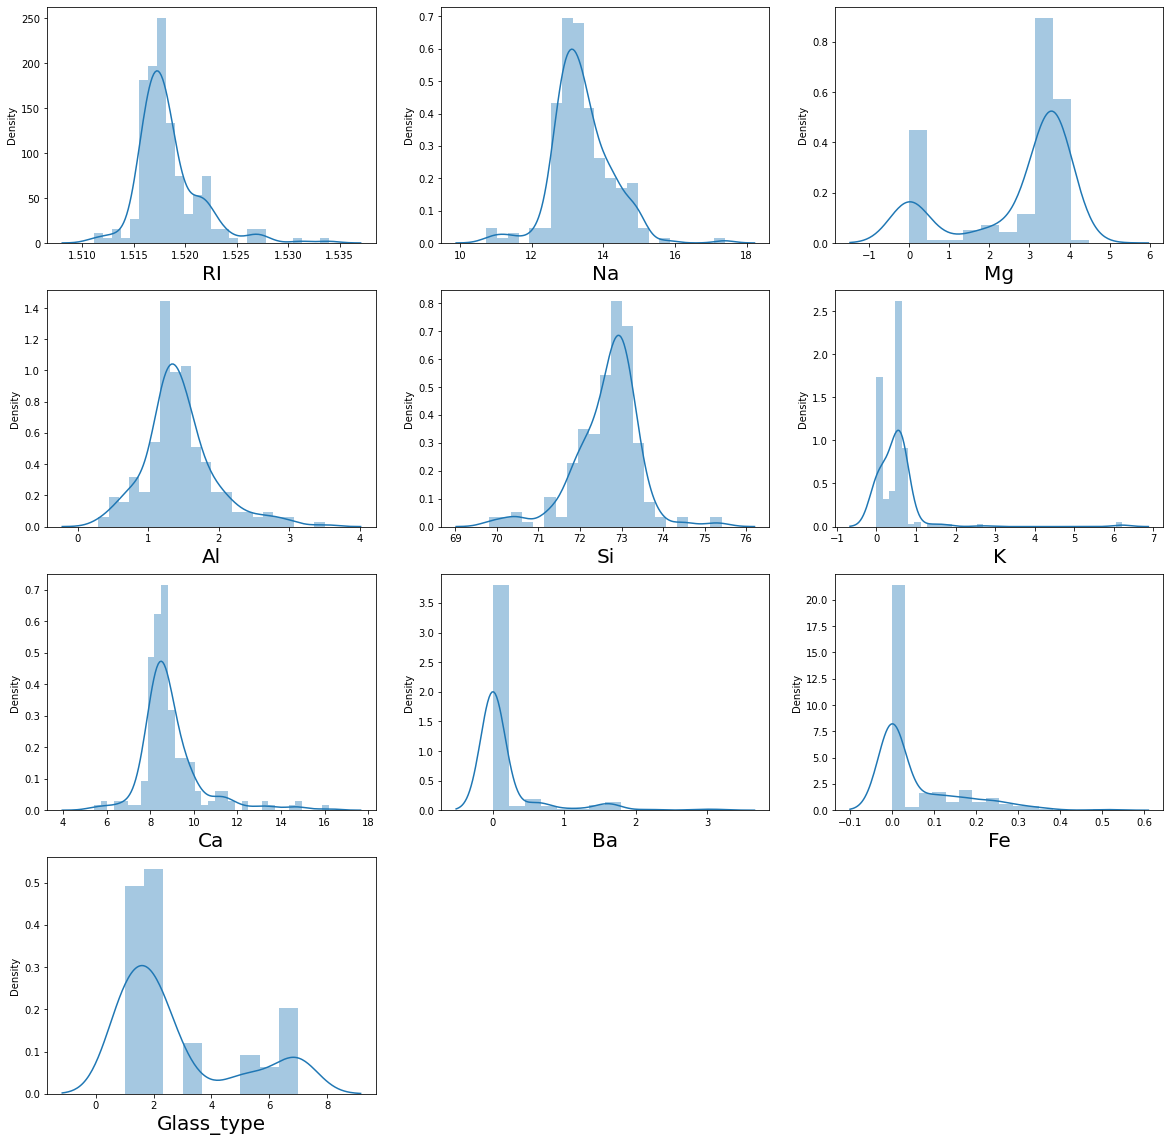

In [10]:
# Data visualization
plt.figure(figsize=(20,20))
plotnumber = 1
for column in data:
    if plotnumber <=10:
        ax= plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show

In [11]:
# Some of the features look a bit skewed 

In [12]:
#checking for skewness
data.skew()

RI            1.625431
Na            0.454181
Mg           -1.152559
Al            0.907290
Si           -0.730447
K             6.551648
Ca            2.047054
Ba            3.416425
Fe            1.754327
Glass_type    1.114915
dtype: float64

In [13]:
# Above observation reveals that some of the features have skewess outside the range of +/- 0.5

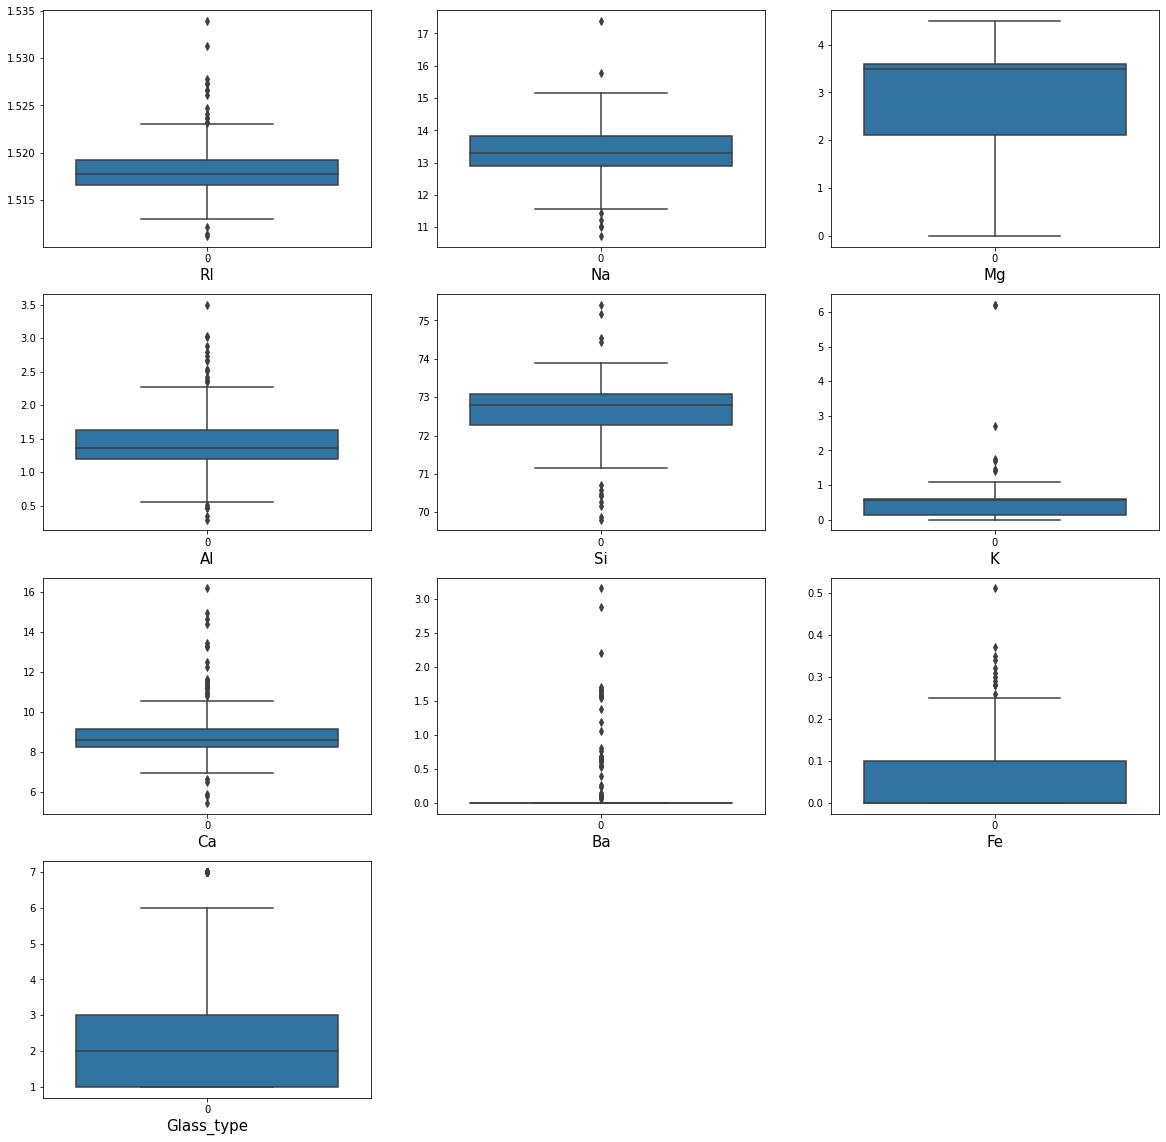

In [14]:
# Checking for outliers using boxplot
plt.figure(figsize=(20,20))
graph =1
for column in data:
    if graph <=10:
        plt.subplot(4,3,graph)
        ax=sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [15]:
# from the above graphs we can say that almost all columns have outliers which is leading to skewness of data 

In [16]:
features = data.drop(columns="Glass_type")

In [17]:
features.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [18]:
#Treating outliers:
# z-score method
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(features))
threshold=3
outliers = np.where(z>3)
outliers

(array([105, 106, 106, 106, 106, 106, 107, 107, 107, 110, 111, 112, 112,
        131, 145, 162, 163, 163, 163, 171, 171, 172, 172, 174, 184, 184,
        188, 189, 201, 201, 203, 207, 213], dtype=int64),
 array([6, 0, 1, 4, 6, 7, 0, 4, 6, 6, 6, 0, 6, 6, 8, 8, 3, 4, 7, 3, 5, 3,
        5, 8, 1, 4, 4, 7, 4, 5, 7, 7, 7], dtype=int64))

In [19]:
new_data=data.drop(outliers[0])
new_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7


In [20]:
data_loss=((214-194)/214)*100
data_loss

9.345794392523365

In [21]:
#checking for skewness
new_data.skew()

RI            0.952733
Na            0.371482
Mg           -1.528849
Al            0.658259
Si           -0.425450
K             0.303175
Ca            1.077962
Ba            3.188587
Fe            1.486479
Glass_type    1.284007
dtype: float64

In [22]:
# If the outliers r deleted we wolud loose almost 10% of our data which i does not seem wise
# Will use Power Transform to deal with outliers and scaling the features


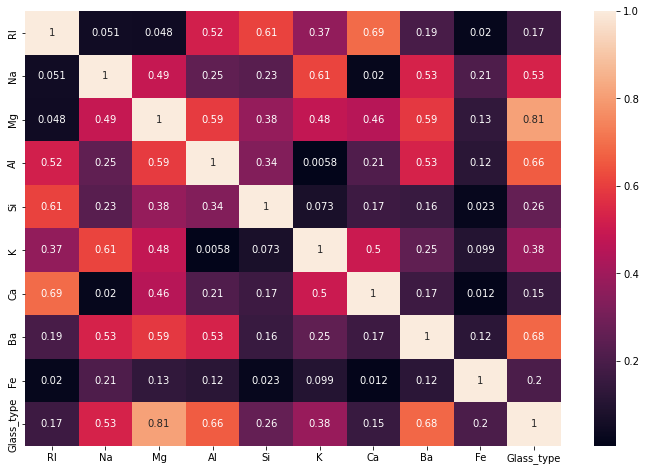

In [23]:
# Plotting heat map to check for multicollinerity and labelv/s feature relationship
df_corr = new_data.corr().abs()
plt.figure(figsize=(12,8))
sns.heatmap(df_corr, annot= True, annot_kws ={'size':10})
plt.show()


In [24]:
#We observe 
#Mg and Ba have a strong relation with Glass Type(Label)
# Refraction(RI) has a strong relation with Ca and Si - need to check for multiollinearity 
# Na and K also have a strong relation -  need to check for multiollinearity 



In [25]:
# Dividing data into feature and label
X= data.drop(columns=['Glass_type'])
Y= data['Glass_type']

In [26]:
#Applying Power Transformer
p_transformer = PowerTransformer()
X_scaled = pd.DataFrame(p_transformer.fit_transform(X), columns=X.columns)


In [27]:
#Checking for skewness
X_scaled.skew()

RI    0.000000
Na   -0.008973
Mg   -0.889528
Al    0.000219
Si    0.130384
K    -0.071816
Ca   -0.209314
Ba    1.824175
Fe    0.858508
dtype: float64

In [28]:
#skewness seems to have reduced

In [29]:
#Using VIF to check for muliticolinearity:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['feature']= X.columns
vif

,vif,feature
0,6.360232,RI
1,3.285308,Na
2,3.872582,Mg
3,2.381283,Al
4,1.636344,Si
5,4.014706,K
6,5.410871,Ca
7,2.621246,Ba
8,1.092056,Fe


In [30]:
#Since vif for all the features is less than 10 we will use all the features

In [31]:
# checking unique values in the label:
print(Y.value_counts(normalize=True, dropna=False)*100)

2    35.514019
1    32.710280
7    13.551402
3     7.943925
5     6.074766
6     4.205607
Name: Glass_type, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

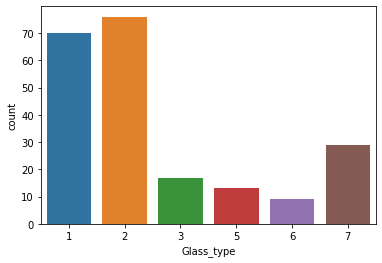

In [32]:
sns.countplot(Y)
plt.show

In [33]:
g_typ = []
for i in Y:
    if i<5:
        g_typ.append(0)
    else:
        g_typ.append(1)


In [34]:
y= pd.DataFrame({'g_typ':g_typ})
y

,g_typ
0,0
1,0
2,0
3,0
4,0
...,...
209,1
210,1
211,1
212,1


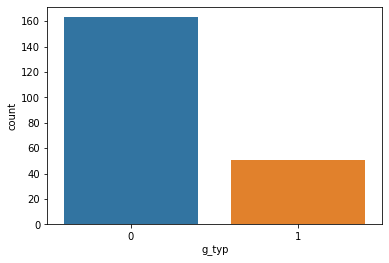

In [35]:
sns.countplot(y['g_typ'])
plt.show()

In [36]:
# checking unique values in the label:
print(y.value_counts(normalize=True, dropna=False)*100)

g_typ
0        76.168224
1        23.831776
dtype: float64


In [37]:
# the target is imbalanced 
#we will balance it using SMOTE
from imblearn.over_sampling import SMOTE

In [38]:
#traintestsplit
x_train,x_test,y_train,y_test = train_test_split (X_scaled,y, test_size=0.25, random_state = 285)

In [39]:
x_train_rs,y_train_rs= SMOTE().fit_resample(x_train,y_train)

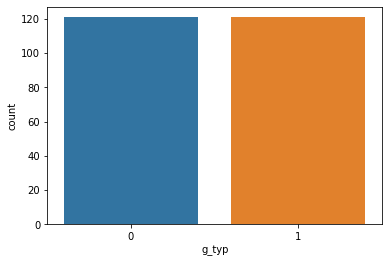

In [40]:
sns.countplot(y_train_rs['g_typ'])
plt.show()

In [41]:
# Target is balanced

In [42]:
# Model Selection
def model_selection (algorithm, x_train_rs,y_train_rs,x_test,y_test):
    algorithm.fit(x_train_rs,y_train_rs)
    pred_train = algorithm.predict(x_train_rs)
    pred_test = algorithm.predict(x_test)
    print ("Acuraccy of training model :",accuracy_score(y_train_rs,pred_train))
    print ("Accuracy of testing model :",accuracy_score(y_test,pred_test))
    print ("Classification report of training data :",classification_report(y_train_rs,pred_train))
    print ("Classification report of test data : ",classification_report(y_test,pred_test))
    print ("Confusion Matrix \n",confusion_matrix(y_test,pred_test))
    
        

In [43]:
#Logistic Regression
lg= LogisticRegression()
model_selection(lg,x_train_rs,y_train_rs,x_test,y_test)

Acuraccy of training model : 0.9710743801652892
Accuracy of testing model : 0.9814814814814815
Classification report of training data :               precision    recall  f1-score   support

           0       0.97      0.97      0.97       121
           1       0.97      0.98      0.97       121

    accuracy                           0.97       242
   macro avg       0.97      0.97      0.97       242
weighted avg       0.97      0.97      0.97       242

Classification report of test data :                precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       0.92      1.00      0.96        12

    accuracy                           0.98        54
   macro avg       0.96      0.99      0.97        54
weighted avg       0.98      0.98      0.98        54

Confusion Matrix 
 [[41  1]
 [ 0 12]]


In [44]:
#KNN
knn= KNeighborsClassifier()
model_selection(knn,x_train_rs,y_train_rs,x_test,y_test)

Acuraccy of training model : 0.9545454545454546
Accuracy of testing model : 0.9444444444444444
Classification report of training data :               precision    recall  f1-score   support

           0       0.97      0.93      0.95       121
           1       0.94      0.98      0.96       121

    accuracy                           0.95       242
   macro avg       0.96      0.95      0.95       242
weighted avg       0.96      0.95      0.95       242

Classification report of test data :                precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.85      0.92      0.88        12

    accuracy                           0.94        54
   macro avg       0.91      0.93      0.92        54
weighted avg       0.95      0.94      0.95        54

Confusion Matrix 
 [[40  2]
 [ 1 11]]


In [45]:
# Hyperparameter Tuning :

parameters = {'algorithm':['kd-tree','brute'],
    'leaf_size': range(3,7),
    'n_neighbors': range(3,10)
    }

clf = GridSearchCV(knn,parameters,cv=5)
clf.fit(x_train_rs,y_train_rs)
print (clf.best_params_)

{'algorithm': 'brute', 'leaf_size': 3, 'n_neighbors': 3}


In [46]:
knn1 = KNeighborsClassifier(algorithm='brute',leaf_size=3,n_neighbors=4)
model_selection(knn1,x_train_rs,y_train_rs,x_test,y_test)

Acuraccy of training model : 0.9669421487603306
Accuracy of testing model : 0.9629629629629629
Classification report of training data :               precision    recall  f1-score   support

           0       0.97      0.96      0.97       121
           1       0.96      0.98      0.97       121

    accuracy                           0.97       242
   macro avg       0.97      0.97      0.97       242
weighted avg       0.97      0.97      0.97       242

Classification report of test data :                precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.92      0.92      0.92        12

    accuracy                           0.96        54
   macro avg       0.95      0.95      0.95        54
weighted avg       0.96      0.96      0.96        54

Confusion Matrix 
 [[41  1]
 [ 1 11]]


In [47]:
#Random Forest 
rf= RandomForestClassifier()
model_selection(rf,x_train_rs,y_train_rs,x_test,y_test)

Acuraccy of training model : 1.0
Accuracy of testing model : 0.9814814814814815
Classification report of training data :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00       121

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242

Classification report of test data :                precision    recall  f1-score   support

           0       0.98      1.00      0.99        42
           1       1.00      0.92      0.96        12

    accuracy                           0.98        54
   macro avg       0.99      0.96      0.97        54
weighted avg       0.98      0.98      0.98        54

Confusion Matrix 
 [[42  0]
 [ 1 11]]


In [48]:
# Hyperparameter Tuning :

parameters = {'n_estimators': range(25,30),
    'criterion':['gini','entropy'],
    'max_depth': range(8,12),
    'min_samples_leaf': range(5,8),
    'min_samples_split':range(3,6)
    }

clf = GridSearchCV(rf,parameters,cv=5)
clf.fit(x_train_rs,y_train_rs)
print (clf.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 7, 'min_samples_split': 5, 'n_estimators': 28}


In [49]:
#Random Forest
rf1= RandomForestClassifier(n_estimators=25, criterion= 'gini', max_depth = 11, min_samples_leaf = 7, min_samples_split = 3)
model_selection(rf1,x_train_rs,y_train_rs,x_test,y_test)

Acuraccy of training model : 0.9545454545454546
Accuracy of testing model : 0.9259259259259259
Classification report of training data :               precision    recall  f1-score   support

           0       0.97      0.94      0.95       121
           1       0.94      0.97      0.96       121

    accuracy                           0.95       242
   macro avg       0.95      0.95      0.95       242
weighted avg       0.95      0.95      0.95       242

Classification report of test data :                precision    recall  f1-score   support

           0       1.00      0.90      0.95        42
           1       0.75      1.00      0.86        12

    accuracy                           0.93        54
   macro avg       0.88      0.95      0.90        54
weighted avg       0.94      0.93      0.93        54

Confusion Matrix 
 [[38  4]
 [ 0 12]]


In [50]:
svc= SVC()
model_selection(svc,x_train_rs,y_train_rs,x_test,y_test)

Acuraccy of training model : 0.9793388429752066
Accuracy of testing model : 0.9814814814814815
Classification report of training data :               precision    recall  f1-score   support

           0       0.98      0.98      0.98       121
           1       0.98      0.98      0.98       121

    accuracy                           0.98       242
   macro avg       0.98      0.98      0.98       242
weighted avg       0.98      0.98      0.98       242

Classification report of test data :                precision    recall  f1-score   support

           0       0.98      1.00      0.99        42
           1       1.00      0.92      0.96        12

    accuracy                           0.98        54
   macro avg       0.99      0.96      0.97        54
weighted avg       0.98      0.98      0.98        54

Confusion Matrix 
 [[42  0]
 [ 1 11]]


In [51]:
# Hyperparameter Tuning :

parameters = {'kernel':['rbf', 'ploy', 'sigmoid'],
              'gamma':['auto','scale'],
              'max_iter': (30, 75, 100)
    }

clf = GridSearchCV(svc,parameters,cv=5)
clf.fit(x_train_rs,y_train_rs)
print (clf.best_params_)

{'gamma': 'auto', 'kernel': 'rbf', 'max_iter': 30}


In [52]:
svc1= SVC(gamma = 'auto',kernel= 'rbf',max_iter=30)
model_selection(svc1,x_train_rs,y_train_rs,x_test,y_test)

Acuraccy of training model : 0.9793388429752066
Accuracy of testing model : 0.9814814814814815
Classification report of training data :               precision    recall  f1-score   support

           0       0.98      0.98      0.98       121
           1       0.98      0.98      0.98       121

    accuracy                           0.98       242
   macro avg       0.98      0.98      0.98       242
weighted avg       0.98      0.98      0.98       242

Classification report of test data :                precision    recall  f1-score   support

           0       0.98      1.00      0.99        42
           1       1.00      0.92      0.96        12

    accuracy                           0.98        54
   macro avg       0.99      0.96      0.97        54
weighted avg       0.98      0.98      0.98        54

Confusion Matrix 
 [[42  0]
 [ 1 11]]


<function matplotlib.pyplot.show(close=None, block=None)>

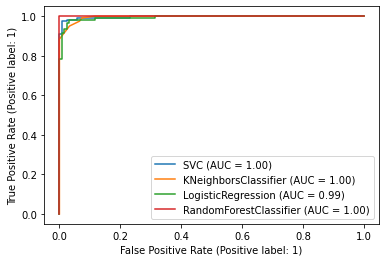

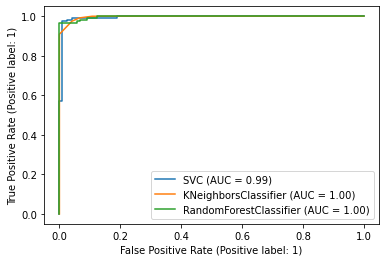

In [53]:
# AUC ROC curve: trainingdata
disp = plot_roc_curve(svc,x_train_rs,y_train_rs)
plot_roc_curve(knn,x_train_rs,y_train_rs, ax=disp.ax_)
plot_roc_curve(lg,x_train_rs,y_train_rs, ax=disp.ax_)
plot_roc_curve(rf,x_train_rs,y_train_rs, ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show
disp1 = plot_roc_curve(svc1,x_train_rs,y_train_rs)
plot_roc_curve(knn1,x_train_rs,y_train_rs, ax=disp1.ax_)
plot_roc_curve(rf1,x_train_rs,y_train_rs, ax=disp1.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

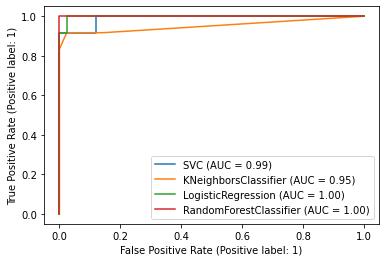

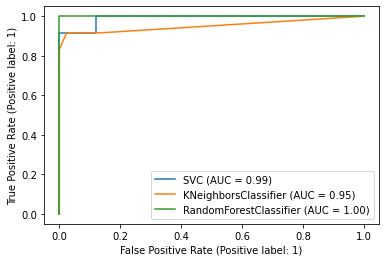

In [54]:
#AUC ROC curve : testdata
disp = plot_roc_curve(svc,x_test,y_test)
plot_roc_curve(knn,x_test,y_test, ax=disp.ax_)
plot_roc_curve(lg,x_test,y_test, ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test, ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show

disp1 = plot_roc_curve(svc1,x_test,y_test)
plot_roc_curve(knn,x_test,y_test, ax=disp1.ax_)
plot_roc_curve(rf,x_test,y_test, ax=disp1.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show

In [55]:
# Selecting SVC for predicting as it has hte best accuracy and most AUC

In [56]:
# Saving Model
import pickle
filename= 'Glass.pkl'
pickle.dump(svc,open(filename, 'wb'))

In [57]:
#Conclusion
a= np.array(y_test)
orignal = a.flatten()
predicted=np.array (svc.predict(x_test))
df = pd.DataFrame({"Orignal":orignal, "Predicted":predicted}, index = range(len(a)))
df

,Orignal,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
5,1,1
6,0,0
7,0,0
8,0,0
9,1,1
